In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import geopandas as gpd
from datetime import datetime

Dataset shape: (194685, 35)

First few rows:


,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0



Basic statistics:


,year,monthsigned,zip,leasedSF,costarID,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
count,194685.000000,193822.000000,194684.000000,1.946850e+05,1.946850e+05,1.455410e+05,1.455410e+05,145541.000000,145541.000000,145541.000000,1.216740e+05,121674.000000,121674.000000,121674.000000,1.216740e+05,121674.000000,121674.000000,121674.000000,1.455410e+05
mean,2020.897116,6.398458,54834.565671,7.418951e+03,8.585231e+05,8.734066e+07,1.761325e+07,0.205129,37.162132,39.730471,1.516990e+07,0.090624,38.532872,41.348356,3.067042e+06,0.017164,32.218578,34.264252,1.327221e+06
std,2.053467,3.415922,32228.307406,2.366310e+04,2.098700e+06,5.975856e+07,1.178294e+07,0.059300,16.183660,16.430368,9.717183e+06,0.035829,17.322360,17.641388,2.875391e+06,0.011111,13.148892,12.922946,1.234172e+06
min,2018.000000,1.000000,1420.000000,1.000000e+00,1.100000e+01,2.010185e+07,1.782779e+06,0.057300,16.957171,18.749409,1.544029e+06,0.021800,18.009119,19.990075,1.108040e+05,0.001700,14.149920,16.865199,5.520300e+04
25%,2019.000000,3.000000,22102.000000,1.265000e+03,1.578120e+05,4.641436e+07,8.345927e+06,0.165001,25.050378,28.860444,7.436069e+06,0.064500,25.717730,29.429358,9.483450e+05,0.008600,23.251198,24.678567,5.355900e+05
50%,2021.000000,6.000000,60607.000000,2.578000e+03,2.802520e+05,6.585438e+07,1.415498e+07,0.197558,32.582522,34.004225,1.218762e+07,0.082600,33.578010,35.731458,1.680762e+06,0.014000,28.384836,30.803734,8.893690e+05
75%,2023.000000,9.000000,85004.000000,5.818000e+03,4.306400e+05,1.153246e+08,2.345972e+07,0.247710,43.667669,44.548462,2.121029e+07,0.109500,46.645537,46.250885,4.512948e+06,0.024200,38.640250,39.026963,1.660927e+06
max,2024.000000,12.000000,98499.000000,1.463234e+06,2.024547e+07,2.683833e+08,5.457790e+07,0.414977,94.191224,84.746663,4.092899e+07,0.190500,99.642941,88.438174,1.435339e+07,0.074600,86.324412,81.205996,9.393220e+06



Missing data analysis:


,Missing Values,Percentage
internal_industry,168284,86.44
company_name,157469,80.88
internal_market_cluster,118847,61.05
sublet_overall_rent,73011,37.50
sublet_internal_class_rent,73011,37.50
sublet_availability_proportion,73011,37.50
sublet_available_space,73011,37.50
direct_overall_rent,73011,37.50
direct_internal_class_rent,73011,37.50
direct_availability_proportion,73011,37.50



Number of large leases (≥10,000 sq ft): 29789


<Figure size 1200x600 with 0 Axes>

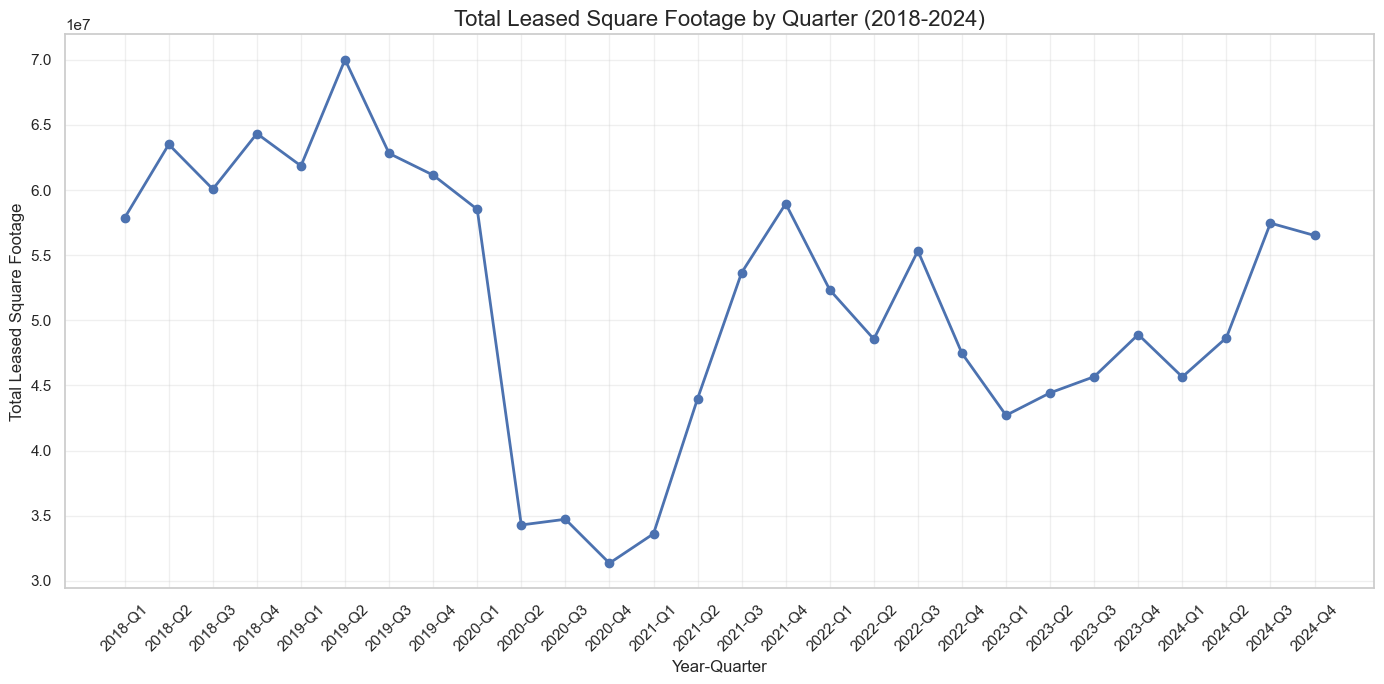

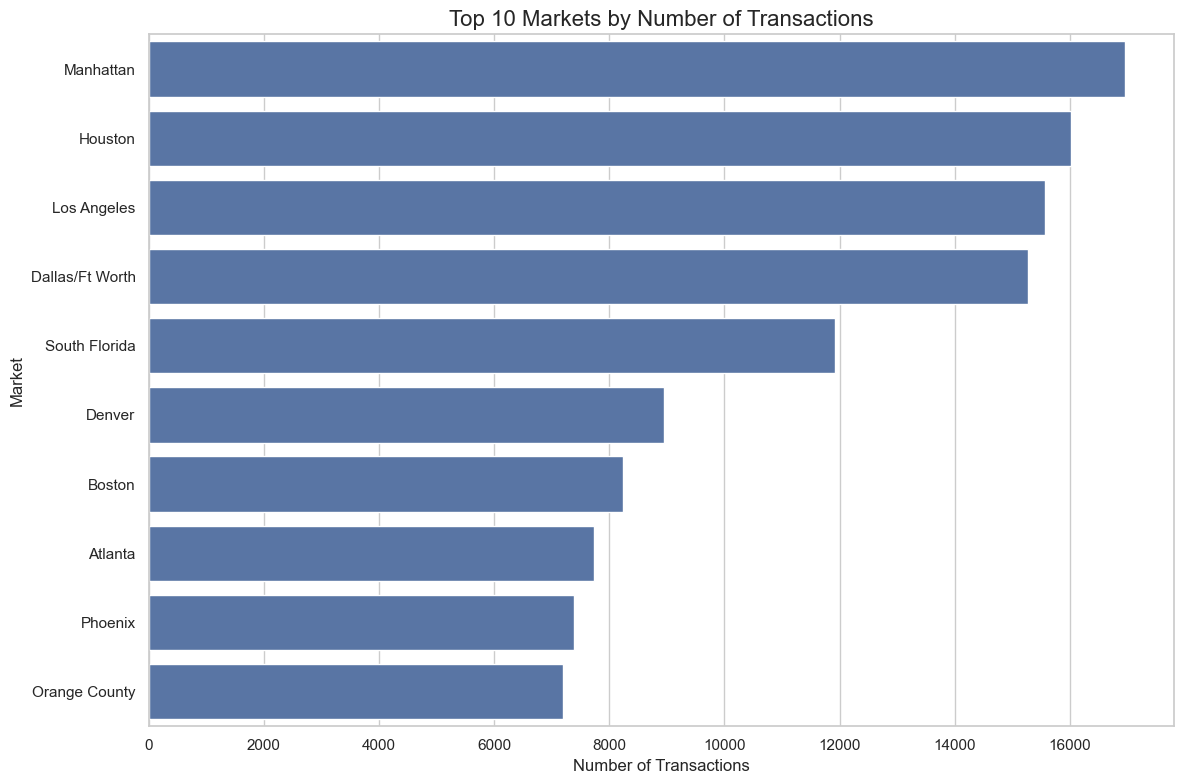

<Figure size 1400x800 with 0 Axes>

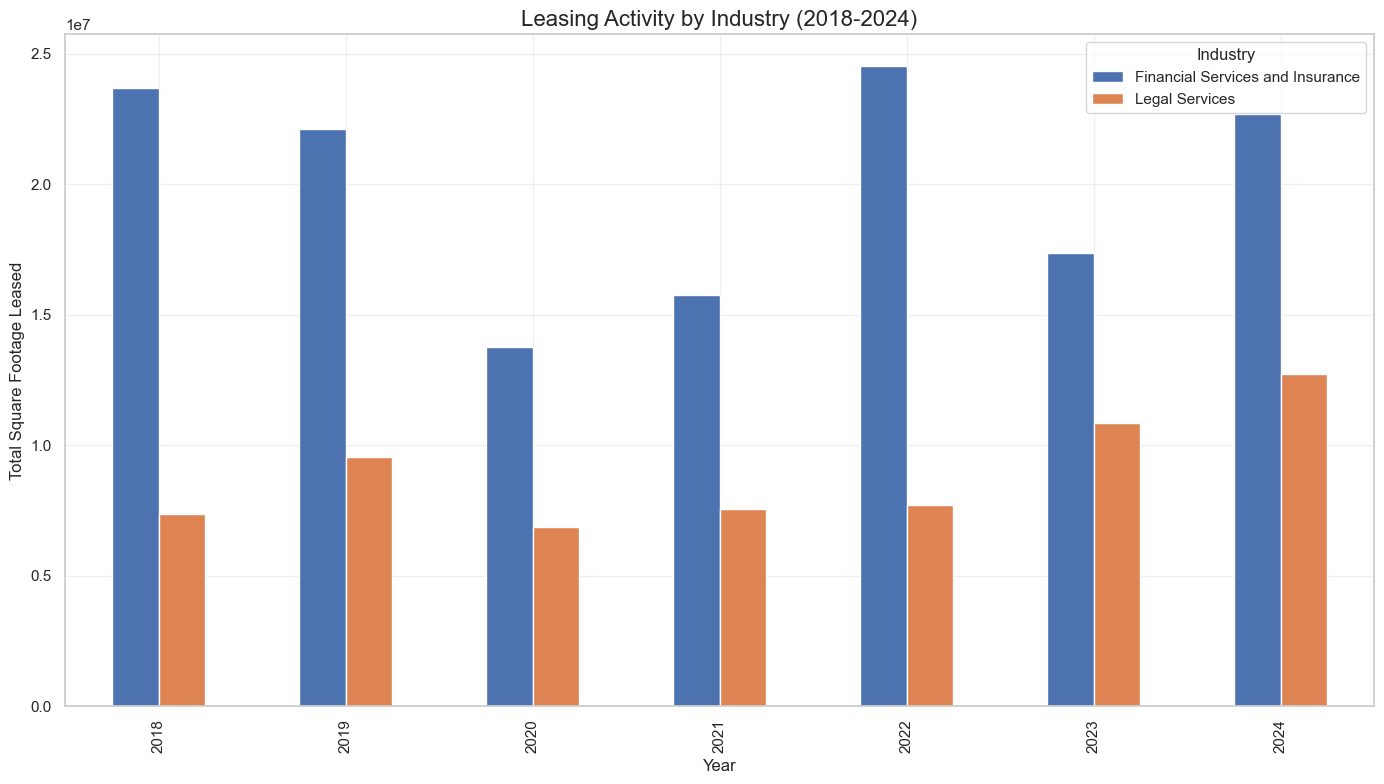

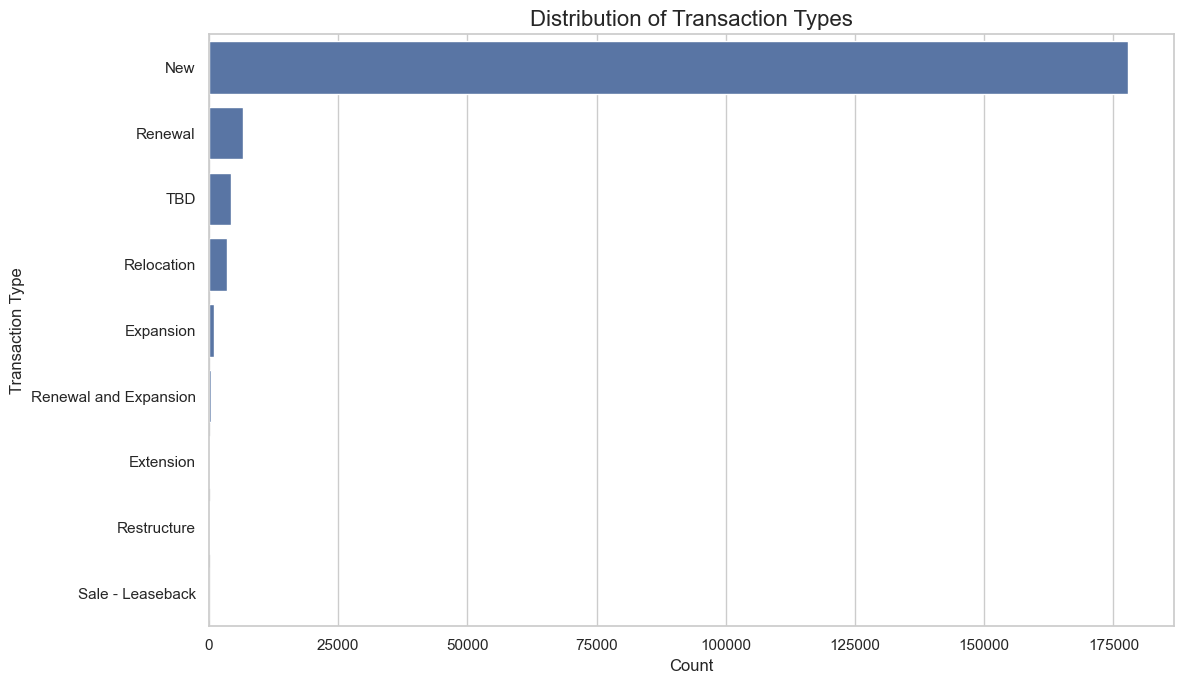

<Figure size 1400x800 with 0 Axes>

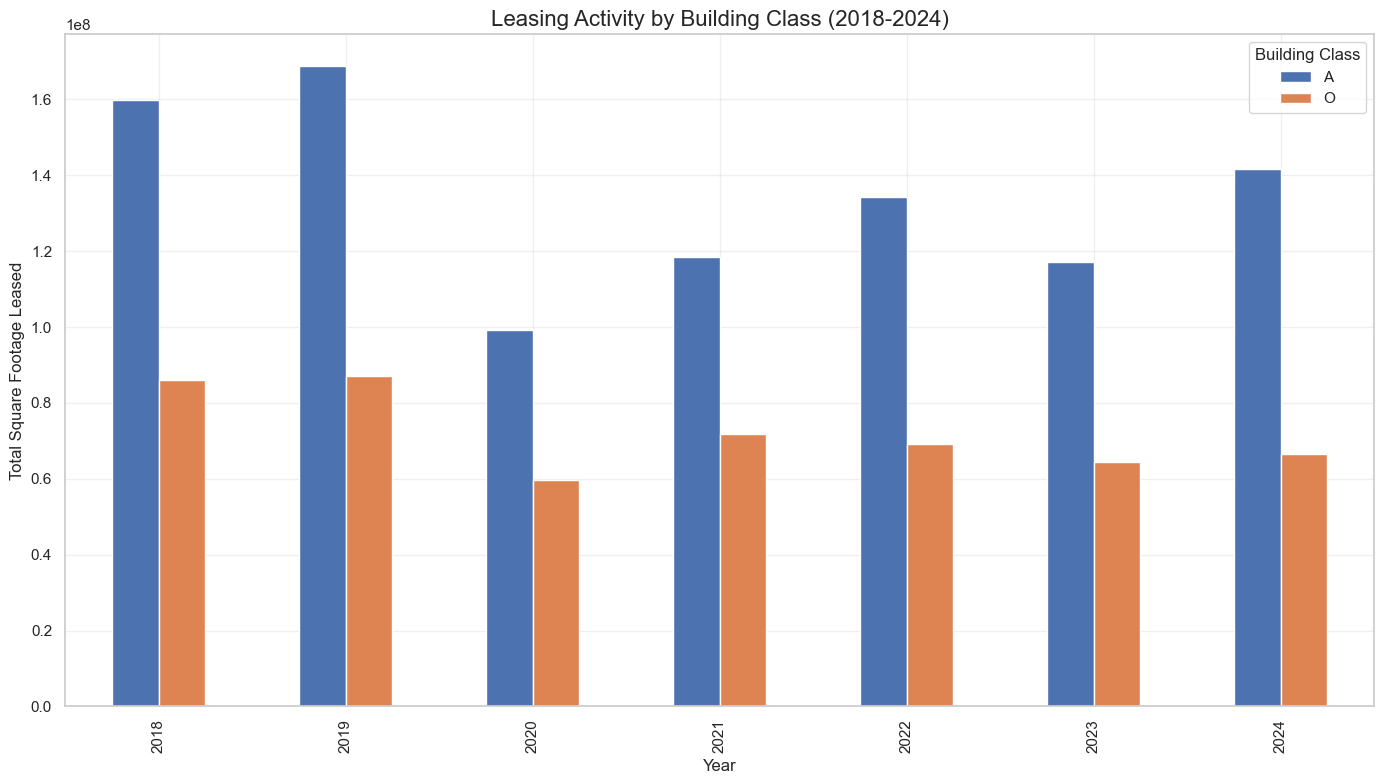

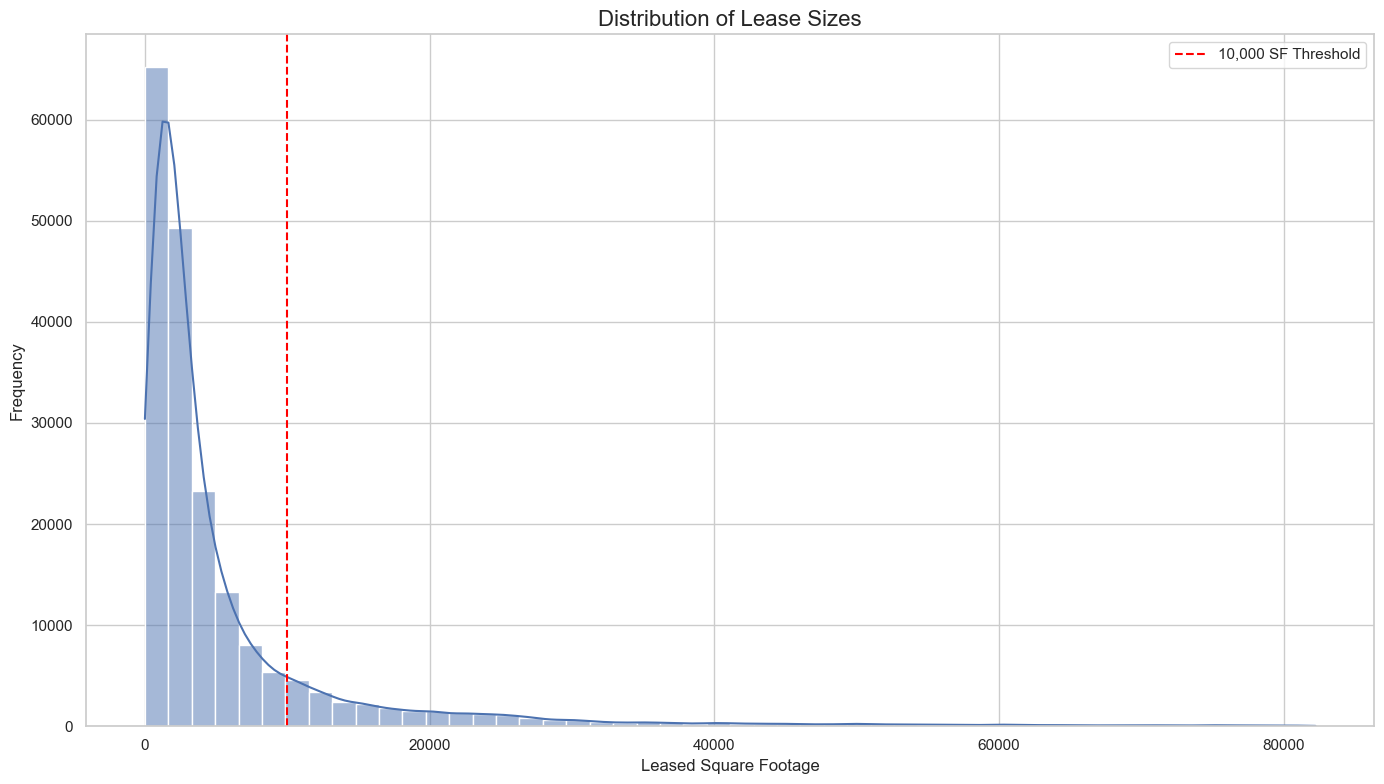

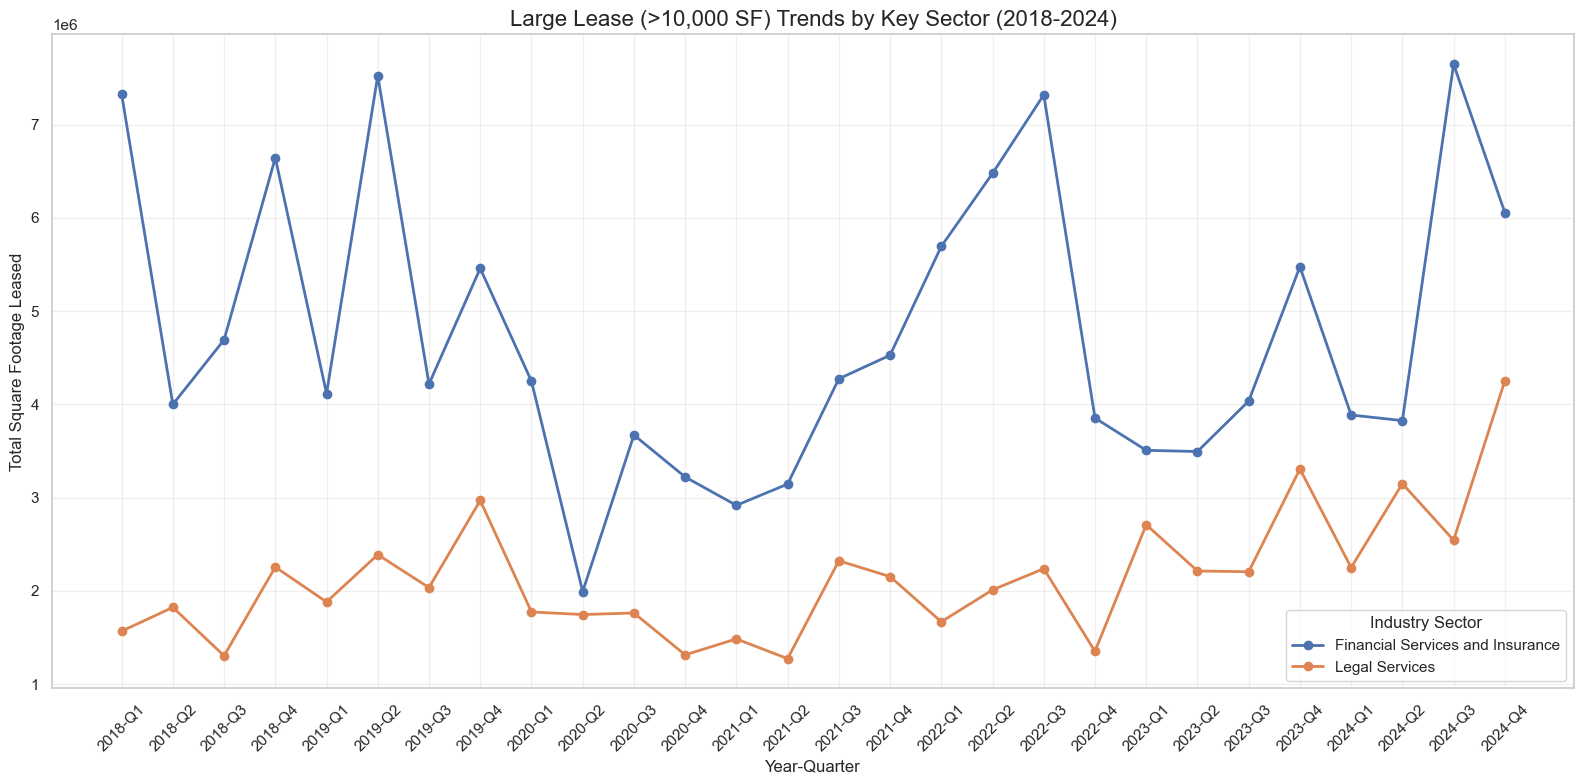

<Figure size 1400x800 with 0 Axes>

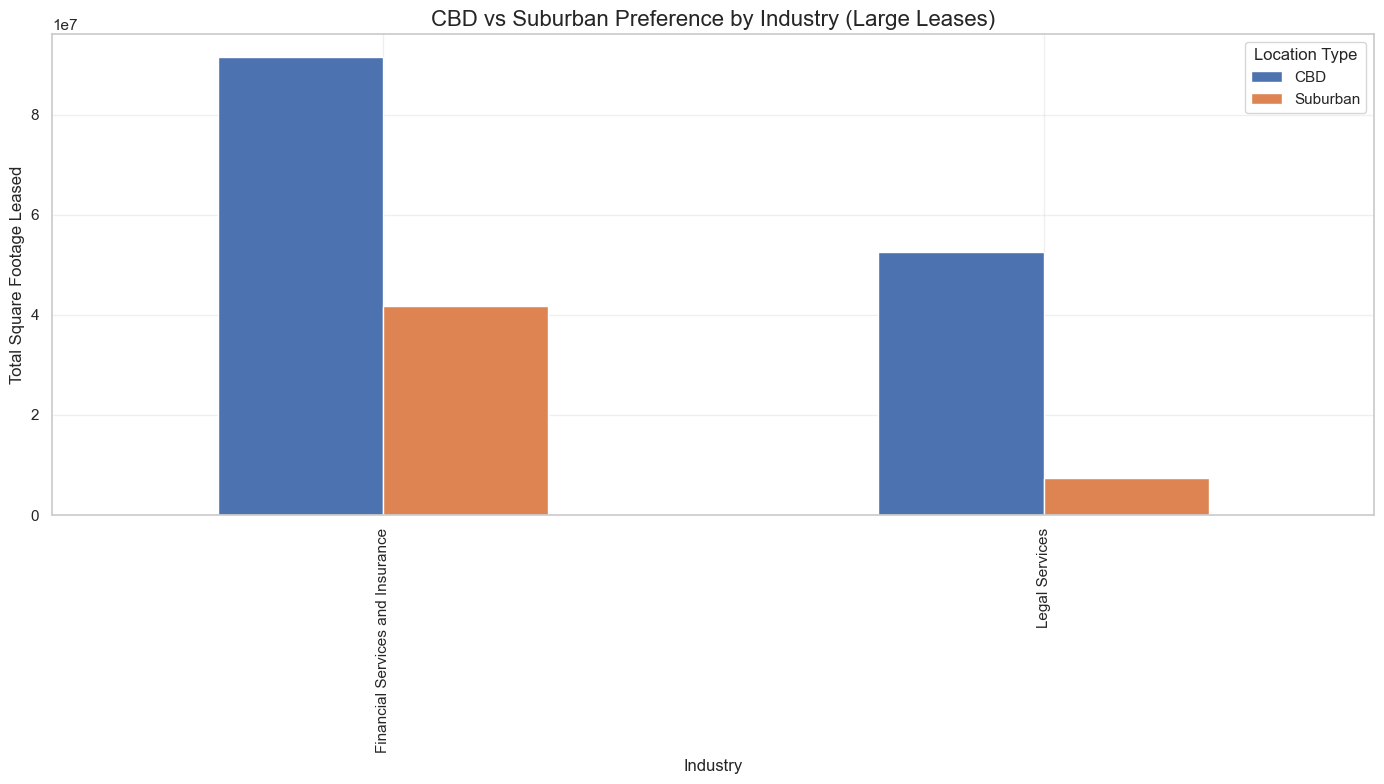

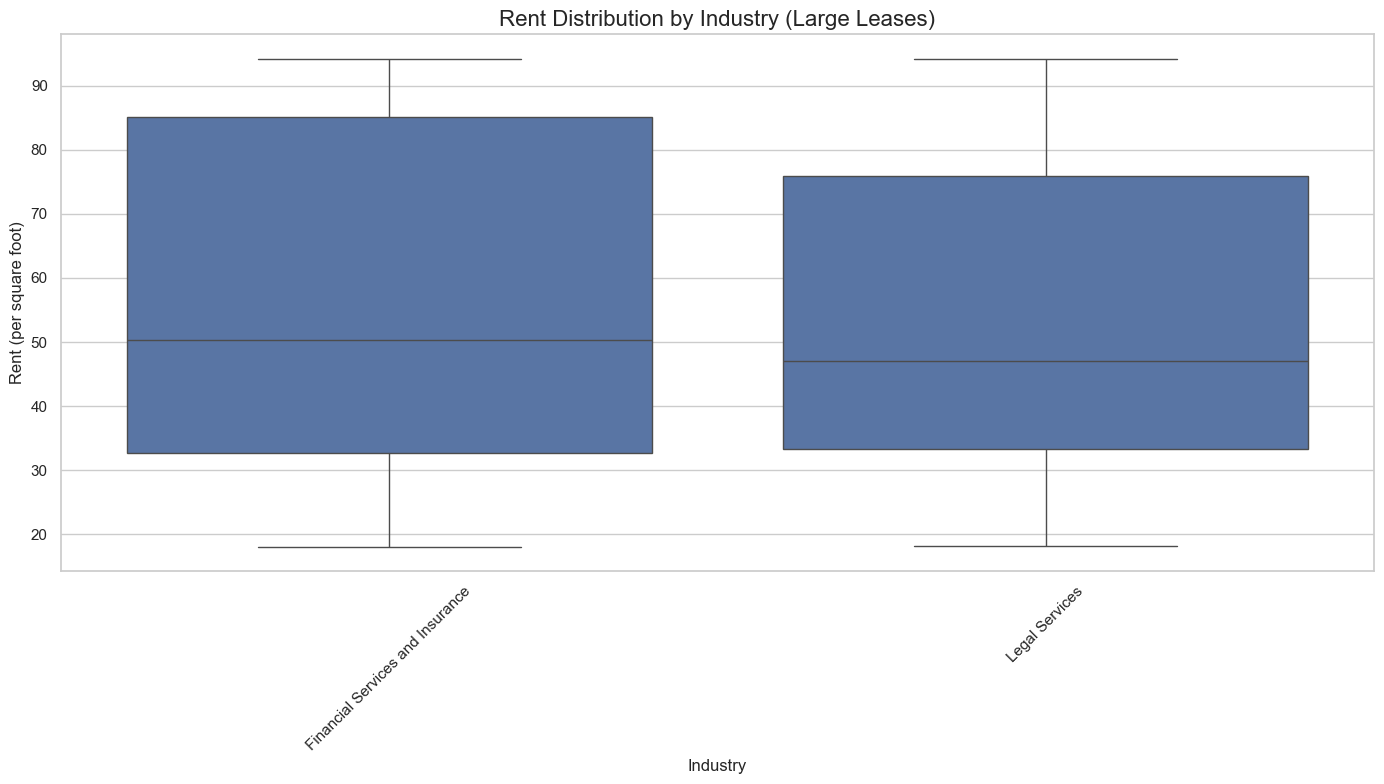

KeyError: 'leasedSF'

In [6]:
# Set plot styles
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Load the data
df = pd.read_csv('Leases.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

print("\nBasic statistics:")
display(df.describe())

# Check missing data
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent})
print("\nMissing data analysis:")
display(missing_df[missing_df['Missing Values'] > 0])

# Convert numeric columns if needed
numeric_cols = ['leasedSF', 'RBA', 'available_space', 'availability_proportion', 
                'internal_class_rent', 'overall_rent', 'zip']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Create year_quarter column for time-based analysis
df['year_quarter'] = df['year'].astype(str) + '_' + df['quarter']

# Focus on leases over 10,000 sq ft as recommended
large_leases = df[df['leasedSF'] >= 10000].copy()
print(f"\nNumber of large leases (≥10,000 sq ft): {len(large_leases)}")

# 1. Time Series Analysis - Leasing Activity by Year/Quarter
plt.figure(figsize=(12, 6))
time_series = df.groupby(['year', 'quarter'])['leasedSF'].sum().reset_index()
time_series['year_quarter'] = time_series['year'].astype(str) + '-' + time_series['quarter']

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(time_series['year_quarter'], time_series['leasedSF'], marker='o', linewidth=2)
plt.title('Total Leased Square Footage by Quarter (2018-2024)', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Total Leased Square Footage', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Market Analysis - Top Markets by Transaction Volume
market_counts = df['market'].value_counts().reset_index()
market_counts.columns = ['Market', 'Number of Transactions']
top_markets = market_counts.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Transactions', y='Market', data=top_markets)
plt.title('Top 10 Markets by Number of Transactions', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Market', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Industry Analysis for the three key sectors mentioned
key_industries = ['Financial Services and Insurance', 'Legal Services', 'Technology']
industry_data = df[df['internal_industry'].isin(key_industries)]

# Create a pivot table of industry by year
industry_pivot = pd.pivot_table(
    industry_data, 
    values='leasedSF', 
    index='year',
    columns='internal_industry', 
    aggfunc='sum'
)

# Plot the industry trends
plt.figure(figsize=(14, 8))
industry_pivot.plot(kind='bar', figsize=(14, 8))
plt.title('Leasing Activity by Industry (2018-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Square Footage Leased', fontsize=12)
plt.legend(title='Industry')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Geographical Analysis - Map of Leasing Activity (if coordinates available)
# If you have state data, this can be used
states_data = df.groupby('state')['leasedSF'].sum().reset_index()
states_data.columns = ['state', 'total_leased_sf']

# Plot on US map using plotly
fig = px.choropleth(
    states_data,
    locations='state',
    locationmode='USA-states',
    color='total_leased_sf',
    scope='usa',
    color_continuous_scale='Viridis',
    title='Total Leased Square Footage by State'
)
fig.update_layout(coloraxis_colorbar=dict(title='Total Leased SF'))
fig.write_html('leasing_by_state.html')
fig.show()

# 5. Transaction Type Analysis
transaction_counts = df['transaction_type'].value_counts().reset_index()
transaction_counts.columns = ['Transaction Type', 'Count']

plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Transaction Type', data=transaction_counts)
plt.title('Distribution of Transaction Types', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Transaction Type', fontsize=12)
plt.tight_layout()
plt.show()

# 6. Building Class Analysis (A vs O)
class_pivot = pd.pivot_table(
    df,
    values='leasedSF',
    index='year',
    columns='internal_class',
    aggfunc='sum'
)

plt.figure(figsize=(14, 8))
class_pivot.plot(kind='bar', figsize=(14, 8))
plt.title('Leasing Activity by Building Class (2018-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Square Footage Leased', fontsize=12)
plt.legend(title='Building Class')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Lease Size Distribution
plt.figure(figsize=(14, 8))
# Remove outliers for better visualization (optional)
lease_sizes = df[df['leasedSF'] < df['leasedSF'].quantile(0.99)]
sns.histplot(data=lease_sizes, x='leasedSF', bins=50, kde=True)
plt.title('Distribution of Lease Sizes', fontsize=16)
plt.xlabel('Leased Square Footage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(x=10000, color='red', linestyle='--', label='10,000 SF Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# 8. Create a comprehensive dashboard using Plotly
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        'Total Leased Area by Quarter', 
        'Top Markets by Transaction Volume',
        'Leasing Activity by Industry',
        'Transaction Types',
        'Building Class Comparison',
        'Lease Size Distribution'
    ),
    specs=[
        [{"type": "scatter"}, {"type": "bar"}],
        [{"type": "bar"}, {"type": "pie"}],
        [{"type": "bar"}, {"type": "histogram"}]
    ]
)

# 8.1 Time Series
fig.add_trace(
    go.Scatter(
        x=time_series['year_quarter'], 
        y=time_series['leasedSF'],
        mode='lines+markers'
    ),
    row=1, col=1
)

# 8.2 Top Markets
fig.add_trace(
    go.Bar(
        y=top_markets['Market'][:5],
        x=top_markets['Number of Transactions'][:5],
        orientation='h'
    ),
    row=1, col=2
)

# 8.3 Industry Analysis
if not industry_pivot.empty:
    for i, industry in enumerate(industry_pivot.columns):
        fig.add_trace(
            go.Bar(
                x=industry_pivot.index,
                y=industry_pivot[industry],
                name=industry
            ),
            row=2, col=1
        )

# 8.4 Transaction Types
fig.add_trace(
    go.Pie(
        labels=transaction_counts['Transaction Type'][:5],
        values=transaction_counts['Count'][:5],
    ),
    row=2, col=2
)

# 8.5 Building Class
if 'A' in class_pivot.columns and 'O' in class_pivot.columns:
    fig.add_trace(
        go.Bar(
            x=class_pivot.index,
            y=class_pivot['A'],
            name='Class A'
        ),
        row=3, col=1
    )
    fig.add_trace(
        go.Bar(
            x=class_pivot.index,
            y=class_pivot['O'],
            name='Other Classes'
        ),
        row=3, col=1
    )

# 8.6 Lease Size Distribution
fig.add_trace(
    go.Histogram(
        x=lease_sizes['leasedSF'],
        nbinsx=50,
    ),
    row=3, col=2
)

# Update layout
fig.update_layout(
    height=1200,
    width=1200,
    title_text="Savills Commercial Real Estate - Key Insights Dashboard",
    showlegend=False
)

fig.write_html('real_estate_dashboard.html')
fig.show()

# 9. Additional Analysis for the Three Key Sectors (Legal, Financial, Tech)
# Focusing on large leases (>10,000 SF) as recommended

# Filter for key industries and large leases
key_sectors_large = large_leases[large_leases['internal_industry'].isin(key_industries)]

# Examine trends over time by sector
sector_time_pivot = pd.pivot_table(
    key_sectors_large,
    values='leasedSF',
    index=['year', 'quarter'],
    columns='internal_industry',
    aggfunc='sum'
).reset_index()

sector_time_pivot['year_quarter'] = sector_time_pivot['year'].astype(str) + '-' + sector_time_pivot['quarter']

# Plot sector trends
plt.figure(figsize=(16, 8))
for industry in key_industries:
    if industry in sector_time_pivot.columns:
        plt.plot(
            sector_time_pivot['year_quarter'], 
            sector_time_pivot[industry], 
            marker='o', 
            linewidth=2,
            label=industry
        )

plt.title('Large Lease (>10,000 SF) Trends by Key Sector (2018-2024)', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Total Square Footage Leased', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Industry Sector')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 10. CBD vs Suburban Analysis for Key Sectors
location_sector_pivot = pd.pivot_table(
    key_sectors_large,
    values='leasedSF',
    index='internal_industry',
    columns='CBD_suburban',
    aggfunc='sum'
)

plt.figure(figsize=(14, 8))
location_sector_pivot.plot(kind='bar', figsize=(14, 8))
plt.title('CBD vs Suburban Preference by Industry (Large Leases)', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Total Square Footage Leased', fontsize=12)
plt.legend(title='Location Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 11. Rent Analysis for Key Sectors
plt.figure(figsize=(14, 8))
sns.boxplot(x='internal_industry', y='internal_class_rent', data=key_sectors_large)
plt.title('Rent Distribution by Industry (Large Leases)', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Rent (per square foot)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 12. Pandemic Impact Analysis - Compare pre and post pandemic trends
# Define pre and post pandemic periods
df['pandemic_period'] = 'Pre-pandemic'
df.loc[((df['year'] == 2020) & (df['quarter'].isin(['Q2', 'Q3', 'Q4']))) | 
       (df['year'] > 2020), 'pandemic_period'] = 'Post-pandemic'

# Compare leasing activity
pandemic_pivot = pd.pivot_table(
    df,
    values='leasedSF',
    index='pandemic_period',
    columns='internal_industry',
    aggfunc=['sum', 'mean', 'count']
)

# Simplify the table for visualization
pandemic_summary = pd.DataFrame({
    'Total SF Leased': pandemic_pivot['sum']['leasedSF'],
    'Average Lease Size': pandemic_pivot['mean']['leasedSF'],
    'Number of Transactions': pandemic_pivot['count']['leasedSF']
})

# Plot pandemic impact on total leasing
pandemic_summary['Total SF Leased'].plot(kind='bar', figsize=(14, 7))
plt.title('Impact of Pandemic on Total Leasing Activity', fontsize=16)
plt.ylabel('Total Square Footage Leased', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 13. Analyze how different markets recovered from the pandemic
# Group by market and pandemic period
market_recovery = pd.pivot_table(
    df,
    values='leasedSF',
    index='market',
    columns='pandemic_period',
    aggfunc='sum'
).reset_index()

# Calculate recovery ratio
if 'Pre-pandemic' in market_recovery.columns and 'Post-pandemic' in market_recovery.columns:
    market_recovery['recovery_ratio'] = market_recovery['Post-pandemic'] / market_recovery['Pre-pandemic']
    
    # Filter markets with significant activity
    significant_markets = market_recovery[
        (market_recovery['Pre-pandemic'] > 100000) & 
        (market_recovery['Post-pandemic'] > 100000)
    ]
    
    # Sort by recovery ratio
    top_recovery = significant_markets.sort_values('recovery_ratio', ascending=False).head(10)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='recovery_ratio', y='market', data=top_recovery)
    plt.title('Top 10 Markets by Post-Pandemic Recovery Ratio', fontsize=16)
    plt.xlabel('Recovery Ratio (Post-pandemic ÷ Pre-pandemic)', fontsize=12)
    plt.ylabel('Market', fontsize=12)
    plt.axvline(x=1, color='red', linestyle='--', label='Break-even point')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 14. Availablity analysis
# Plot availability proportion trends over time
availability_trends = df.groupby(['year', 'quarter'])['availability_proportion'].mean().reset_index()
availability_trends['year_quarter'] = availability_trends['year'].astype(str) + '-' + availability_trends['quarter']

plt.figure(figsize=(14, 7))
plt.plot(availability_trends['year_quarter'], availability_trends['availability_proportion'], marker='o', linewidth=2)
plt.title('Average Availability Proportion by Quarter (2018-2024)', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Average Availability Proportion', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 15. Advanced Analysis: Market Correlations
# Calculate correlation between rent and availability
rent_avail_corr = df.groupby('market')[['internal_class_rent', 'availability_proportion']].corr().iloc[0::2, 1].reset_index()
rent_avail_corr.columns = ['Market', 'Correlation']
rent_avail_corr = rent_avail_corr.sort_values('Correlation')

# Plot markets with strongest positive and negative correlations
top_corr = pd.concat([rent_avail_corr.head(5), rent_avail_corr.tail(5)])

plt.figure(figsize=(14, 8))
sns.barplot(x='Correlation', y='Market', data=top_corr)
plt.title('Markets with Strongest Correlations Between Rent and Availability', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Market', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

print("Exploratory analysis complete.")